In [2]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import glob as gb
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

### training information

In [3]:
labels = ["buildings", "forest", "mountain", "sea"]
training_images = []
training_labels = []
idx = 0
class_label = 0
train = "training/"
for folder in  os.listdir(train) :
    print(folder)
    files = gb.glob(pathname= str( train + folder + '/*.jpg'))
    for image in files:
        im = Image.open(image)
        data = np.array(im)
        data = data[:,:,0]
        image_array = cv.resize(data , (32,32))
        training_images.append(list(image_array))
        training_labels.append(class_label)
        idx = idx + 1
    class_label = class_label + 1

buildings
forest
mountain
sea


In [4]:
training_images = np.array(training_images)
training_labels = np.array(training_labels)
print(training_images.shape)
print(training_labels.shape)

(10669, 32, 32)
(10669,)


In [5]:
training_images = training_images.reshape(len(training_images), -1)
training_images.shape

(10669, 1024)

### testing information

In [6]:
labels = ["buildings", "forest", "mountain", "sea"]
testing_images = []
testing_labels = []
idx = 0
class_label = 0
test = "testing/"
for folder in  os.listdir(test) :
    print(folder)
    files = gb.glob(pathname= str( test + folder + '/*.jpg'))
    for image in files:
        im = Image.open(image)
        data = np.array(im)
        data = data[:,:,0]
        image_array = cv.resize(data , (32,32))
        testing_images.append(list(image_array))
        testing_labels.append(class_label)
        idx = idx + 1
    class_label = class_label + 1

buildings
forest
mountain
sea


In [7]:
testing_images = np.array(testing_images)
testing_labels = np.array(testing_labels)
print(testing_images.shape)
print(testing_labels.shape)

(960, 32, 32)
(960,)


In [8]:
testing_images = testing_images.reshape(len(testing_images), -1)
testing_images.shape

(960, 1024)

In [9]:
model = svm.SVC(kernel='rbf',max_iter=10)
result = model.fit(training_images, training_labels)

C:\MyAnaconda\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [10]:
prediction = model.predict(testing_images)
print ("Accuracy = ", metrics.accuracy_score(testing_labels, prediction))

Accuracy =  0.39375


### confusion curve

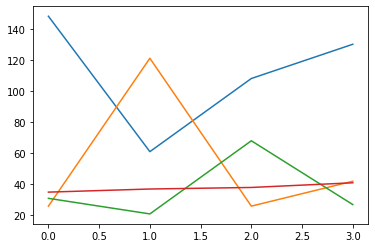

In [23]:
from sklearn.metrics import confusion_matrix
plt.plot(confusion_matrix(testing_labels,prediction))

C:\MyAnaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
C:\MyAnaconda\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\MyAnaconda\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\MyAnaconda\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\MyAnaconda\l

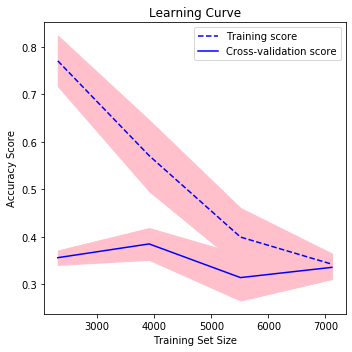

In [30]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model,
                                                        training_images, training_labels, cv=3, scoring='accuracy',)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(5,5))
plt.plot(train_sizes, train_mean, '--', color='blue',  label="Training score")
plt.plot(train_sizes, test_mean, color='blue', label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="pink")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="pink")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()